In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [7]:
def percent_missing(df):
    
     # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)
    
    # Count number of missing values per column
    missingCount = df.isnull().sum()
    
     # Calculate total number of missing values
    totalMissing = missingCount.sum()
    
     # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
    
percent_missing(db)  
    

The dataset contains 12.5 % missing values.


In [8]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
# drop columns with more than 50% missing values
db_clean = db.dropna(axis=1, thresh = int(0.5*db.shape[0]), inplace=True)
db.shape

(150001, 45)

In [10]:
db.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [11]:
db.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,1.500000e+05,1.500000e+05,1.500000e+05,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,5.696395e+06,4.643231e+06,8.103761e+07,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487775e+04,2.153975e+04,5.744079e+07,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930450e+04,4.679350e+04,8.639998e+07,203.000000,217.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,100.000000,4.000000,1.000000,0.000000,100.000000,0.000000,0.000000,0.000000,6.796095e+05,5.990952e+05,1.324308e+08,2650.000000,2451.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454e

In [12]:
#check skewness of the data
db.skew(axis = 0, skipna = True)

Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec 

We can substitute most of null values as NaN can be changed to value of 0
replacing null values with apprioprate data based on the type the columns.

In [ ]:
# IMSI, MSISDN/Number, Avg RTT DL (ms), Avg RTT UL (ms), UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%) 
# 50 Kbps < UL TP < 300 Kbps (%), UL TP > 300 Kbps (%) , Nb of sec with Vol DL < 6250B,
# Nb of sec with Vol UL < 1250B
# the above mentioned column more of skew data, fill the the missing value.


In [13]:
db['IMSI'] = db['IMSI'].fillna(db['IMSI'].median())
db['Avg RTT DL (ms)'] = db['Avg RTT DL (ms)'].fillna(db['Avg RTT DL (ms)'].median())
db['Avg RTT UL (ms)'] = db['Avg RTT UL (ms)'].fillna(db['Avg RTT UL (ms)'].median())
db['UL TP < 10 Kbps (%)'] = db['UL TP < 10 Kbps (%)'].fillna(db['UL TP < 10 Kbps (%)'].median())
db['10 Kbps < UL TP < 50 Kbps (%)'] = db['10 Kbps < UL TP < 50 Kbps (%)'].fillna(db['10 Kbps < UL TP < 50 Kbps (%)'].median())
db['50 Kbps < UL TP < 300 Kbps (%)'] = db['50 Kbps < UL TP < 300 Kbps (%)'].fillna(db['50 Kbps < UL TP < 300 Kbps (%)'].median())
db['UL TP > 300 Kbps (%)'] = db['UL TP > 300 Kbps (%)'].fillna(db['UL TP > 300 Kbps (%)'].median())
db['Nb of sec with Vol DL < 6250B'] = db['Nb of sec with Vol DL < 6250B'].fillna(db['Nb of sec with Vol DL < 6250B'].median())
db['Nb of sec with Vol UL < 1250B'] = db['Nb of sec with Vol UL < 1250B'].fillna(db['Nb of sec with Vol UL < 1250B'].median())


In [ ]:
# Bearer Id, IMEI, Last Location Name,DL TP < 50 Kbps (%),UL TP < 10 Kbps (%), 10 Kbps < UL TP < 50 Kbps (%),
# Handset Manufacturer               
# Handset Type                        
# Nb of sec with Vol DL < 6250B       
# Nb of sec with Vol UL < 1250B       

In [14]:
db['Bearer Id'] = db['Bearer Id'].fillna(db['Bearer Id'].median())
db['IMEI'] = db['IMEI'].fillna(db['IMEI'].median())
db['Last Location Name'].fillna('Unknown',inplace=True)
db['MSISDN/Number'] = db['MSISDN/Number'].fillna(db['MSISDN/Number'].median())
db['Handset Manufacturer'].fillna('Unknown',inplace=True)
db['Handset Type'].fillna('Unknown',inplace=True)
db['DL TP < 50 Kbps (%)'] = db['DL TP < 50 Kbps (%)'].fillna(db['DL TP < 50 Kbps (%)'].median())
db['UL TP < 10 Kbps (%)'] = db['UL TP < 10 Kbps (%)'].fillna(db['UL TP < 10 Kbps (%)'].median())
db['10 Kbps < UL TP < 50 Kbps (%)'] = db['10 Kbps < UL TP < 50 Kbps (%)'].fillna(db['10 Kbps < UL TP < 50 Kbps (%)'].median())
db['50 Kbps < DL TP < 250 Kbps (%)'] = db['50 Kbps < DL TP < 250 Kbps (%)'].fillna(db['50 Kbps < DL TP < 250 Kbps (%)'].median())
db['250 Kbps < DL TP < 1 Mbps (%)'] = db['250 Kbps < DL TP < 1 Mbps (%)'].fillna(db['250 Kbps < DL TP < 1 Mbps (%)'].median())
db['DL TP > 1 Mbps (%)'] = db['DL TP > 1 Mbps (%)'].fillna(db['DL TP > 1 Mbps (%)'].median())
db['Nb of sec with Vol DL < 6250B'] = db['Nb of sec with Vol DL < 6250B'].fillna(db['Nb of sec with Vol DL < 6250B'].median())
db['Nb of sec with Vol UL < 1250B'] = db['Nb of sec with Vol UL < 1250B'].fillna(db['Nb of sec with Vol UL < 1250B'].median())



In [15]:
db.isnull().sum()

Bearer Id                         0
Start                             1
Start ms                          1
End                               1
End ms                            1
Dur. (ms)                         1
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           1
Avg Bearer TP UL (kbps)           1
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         1
Activity Duration UL (ms)         1
Dur. (ms).1                       1
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [16]:
#droping rows which is supposed to have unique value and have null or NaN values
db = db.dropna()

In [17]:
db.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

# top 10 handsets used by the customers

In [18]:
top10Handsets = db.groupby('Handset Type')['Handset Type'].count().nlargest(10)
top10Handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

# identify the top 3 handset manufacturers

In [22]:
top3Handset_manufacturer = db.groupby('Handset Manufacturer')['Handset Manufacturer'].count().nlargest(3)
top3Handset_manufacturer

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

# identify the top 5 handsets per handset manufacturer

In [23]:
top5HadsetPerManufacturer = db['Handset Type'].groupby(db['Handset Manufacturer']).apply(lambda x:x.value_counts().head(5)).to_frame()
top5HadsetPerManufacturer

Handset Type
Handset Manufacturer                                                                   
A-Link Telecom International Co Limited A-Link Telecom I. Cubot X18 Plus              2
                                        A-Link Telecom I. Cubot Note Plus             1
                                        A-Link Telecom I. Cubot R9                    1
                                        A-Link Telecom I. Cubot Nova                  1
                                        A-Link Telecom I. Cubot Note S                1
...                                                                                 ...
Zte                                     Zte Starxtrem By Sfr                          1
ZyXEL Communications Corp               Zyxel Communicat. Zyxel Wah7706               1
Zyxel Communications Corp               Zyxel Communicat. Lte7460                     1
                                        Zyxel Communicat. Sbg3600                     1
undefined                               undefined                                  8987

[435 rows x 1 columns]

# Task 1

# Task 1.1

# Number of xDR sessions per user

In [24]:
db.groupby(['Bearer Id'])['Bearer Id'].count()

Bearer Id
6.917538e+18    1
6.917538e+18    1
6.917538e+18    1
6.917538e+18    1
6.917538e+18    1
               ..
1.318654e+19    1
1.318654e+19    1
1.318654e+19    1
1.318654e+19    1
1.318654e+19    1
Name: Bearer Id, Length: 134709, dtype: int64

# Session duration 

In [25]:
#Session duration for each user in milliseconds
db.groupby(['Bearer Id'])['Dur. (ms)'].sum()

Bearer Id
6.917538e+18     24534.0
6.917538e+18     21489.0
6.917538e+18     27786.0
6.917538e+18     15635.0
6.917538e+18     24264.0
                  ...   
1.318654e+19     80024.0
1.318654e+19    145291.0
1.318654e+19     86399.0
1.318654e+19     86399.0
1.318654e+19    103113.0
Name: Dur. (ms), Length: 134709, dtype: float64

# the total download (DL) and upload (UL) data per user

In [26]:
db.groupby(['Bearer Id'])['Total DL (Bytes)','Total UL (Bytes)'].sum()

,Total DL (Bytes),Total UL (Bytes)
Bearer Id,,
6.917538e+18,500721999.0,41704610.0
6.917538e+18,709549265.0,38693596.0
6.917538e+18,854465860.0,15548926.0
6.917538e+18,825786510.0,49605688.0
6.917538e+18,624957763.0,21983463.0
...,...,...
1.318654e+19,145293140.0,35412664.0
1.318654e+19,387001634.0,36189587.0
1.318654e+19,872688792.0,35919460.0


# The total data volume (in Bytes) during this session for each application

In [27]:
newdf = db.groupby('Bearer Id').agg({'Bearer Id' : ['count'],'Dur. (ms)':['sum'],'Total DL (Bytes)':['sum'],'Total UL (Bytes)':['sum']
                                          ,'Social Media DL (Bytes)':['sum'],'Social Media UL (Bytes)':['sum'], 'Google DL (Bytes)': ['sum']
                                          ,'Google UL (Bytes)': ['sum'],'Email DL (Bytes)':['sum'],'Email UL (Bytes)': ['sum'],'Youtube DL (Bytes)':['sum']
                                          ,'Youtube UL (Bytes)':['sum'],'Netflix DL (Bytes)':['sum'],'Netflix UL (Bytes)':['sum'],'Gaming DL (Bytes)':['sum']
                                          ,'Gaming UL (Bytes)': ['sum'],'Other DL (Bytes)':['sum'], 'Other UL (Bytes)':['sum']})

newdf.columns = ["_".join(x) for x in newdf.columns.ravel()]

newdf['social_media_total'] = newdf['Social Media DL (Bytes)_sum'] + newdf['Social Media UL (Bytes)_sum']
newdf['google_total'] = newdf['Google DL (Bytes)_sum'] + newdf['Google UL (Bytes)_sum']
newdf['email_total'] = newdf['Email DL (Bytes)_sum'] + newdf['Email UL (Bytes)_sum']
newdf['youtube_total'] = newdf['Youtube DL (Bytes)_sum'] + newdf['Youtube UL (Bytes)_sum']
newdf['netflix_total'] = newdf['Netflix DL (Bytes)_sum'] + newdf['Netflix UL (Bytes)_sum']
newdf['gaming_total'] = newdf['Gaming DL (Bytes)_sum'] + newdf['Gaming UL (Bytes)_sum']
newdf['other_total'] = newdf['Other DL (Bytes)_sum'] + newdf['Other UL (Bytes)_sum']

In [53]:
newdf

,Bearer Id_count,Dur. (ms)_sum,Total DL (Bytes)_sum,Total UL (Bytes)_sum,Social Media DL (Bytes)_sum,Social Media UL (Bytes)_sum,Google DL (Bytes)_sum,Google UL (Bytes)_sum,Email DL (Bytes)_sum,Email UL (Bytes)_sum,Youtube DL (Bytes)_sum,Youtube UL (Bytes)_sum,Netflix DL (Bytes)_sum,Netflix UL (Bytes)_sum,Gaming DL (Bytes)_sum,Gaming UL (Bytes)_sum,Other DL (Bytes)_sum,Other UL (Bytes)_sum,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,,
6.917538e+18,1,24534.0,5.007220e+08,41704610.0,2404741.0,2410.0,5791591.0,2871336.0,782388.0,806920.0,6139644.0,2071526.0,19494278.0,14668354.0,4.661094e+08,5333340.0,6.707510e+08,15950724.0,2407151.0,8662927.0,1589308.0,8211170.0,34162632.0,4.714427e+08,6.867018e+08
6.917538e+18,1,21489.0,7.095493e+08,38693596.0,2478607.0,11936.0,3605446.0,2825198.0,446376.0,525108.0,10281221.0,18119976.0,19455048.0,10631652.0,6.732826e+08,2670856.0,5.016085e+08,3908870.0,2490543.0,6430644.0,971484.0,28401197.0,30086700.0,6.759534e+08,5.055173e+08
6.917538e+18,1,27786.0,8.544659e+08,15548926.0,944612.0,2827.0,10373157.0,56392.0,128003.0,34038.0,5385159.0,4295851.0,15755839.0,1300571.0,8.218791e+08,8521398.0,4.728469e+08,1337849.0,947439.0,10429549.0,162041.0,9681010.0,17056410.0,8.304005e+08,4.741847e+08
6.917538e+18,1,15635.0,8.257865e+08,49605688.0,1817239.0,19827.0,269988.0,3696393.0,3191192.0,896670.0,12347020.0,11089528.0,2859358.0,1738176.0,8.053017e+08,16257481.0,2.430380e+07,15907613.0,1837066.0,3966381.0,4087862.0,23436548.0,4597534.0,8.215592e+08,4.021141e+07
6.917538e+18,1,24264.0,6.249578e+08,21983463.0,1867318.0,18928.0,1689296.0,195216.0,740633.0,590043.0,15231815.0,8401567.0,21563985.0,2817981.0,5.838647e+08,6992868.0,6.851222e+08,2966860.0,1886246.0,1884512.0,1330676.0,23633382.0,24381966.0,5.908576e+08,6.880891e+08
6.917538e+18,1,15548.0,5.721995e+08,47281374.0,1502346.0,37348.0,8917833.0,701876.0,332813.0,537902.0,14602694.0,1237356.0,4506463.0,17006591.0,5.423374e+08,15820659.0,4.636987e+08,11939642.0,1539694.0,9619709.0,870715.0,15840050.0,21513054.0,5.581580e+08,4.756384e+08
6.917538e+18,1,20701.0,7.361892e+08,26136298.0,620907.0,29485.0,2070826.0,699962.0,3067254.0,146342.0,5548350.0,19641923.0,1524552.0,2512617.0,7.233573e+08,2840435.0,7.859117e+08,265534.0,650392.0,2770788.0,3213596.0,25190273.0,4037169.0,7.261978e+08,7.861772e+08
6.917538e+18,1,12604.0,8.366814e+08,50633950.0,56234.0,1250.0,1795518.0,1092414.0,392715.0,52817.0,7551668.0,5094327.0,14394641.0,17359541.0,8.124907e+08,11075567.0,5.652172e+08,15958034.0,57484.0,2887932.0,445532.0,12645995.0,31754182.0,8.235662e+08,5.811753e+08
6.917538e+18,1,61431.0,9.013464e+07,38752753.0,1959793.0,21396.0,7711263.0,297843.0,208023.0,430760.0,17029659.0,6100738.0,9910593.0,14851827.0,5.331530e+07,7382302.0,9.655214e+06,9667887.0,1981189.0,8009106.0,638783.0,23130397.0,24762420.0,6.069761e+07,1.932310e+07


# Task 1.2

In [28]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 134709 entries, 6.91753751854353e+18 to 1.31865411671342e+19
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Bearer Id_count              134709 non-null  int64  
 1   Dur. (ms)_sum                134709 non-null  float64
 2   Total DL (Bytes)_sum         134709 non-null  float64
 3   Total UL (Bytes)_sum         134709 non-null  float64
 4   Social Media DL (Bytes)_sum  134709 non-null  float64
 5   Social Media UL (Bytes)_sum  134709 non-null  float64
 6   Google DL (Bytes)_sum        134709 non-null  float64
 7   Google UL (Bytes)_sum        134709 non-null  float64
 8   Email DL (Bytes)_sum         134709 non-null  float64
 9   Email UL (Bytes)_sum         134709 non-null  float64
 10  Youtube DL (Bytes)_sum       134709 non-null  float64
 11  Youtube UL (Bytes)_sum       134709 non-null  float64
 12  Netflix DL (Bytes)_sum 

In [29]:
newdf['Bearer Id_count'].describe()

count    134709.000000
mean          1.113511
std           2.721729
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         990.000000
Name: Bearer Id_count, dtype: float64

In [30]:
newdf['Dur. (ms)_sum'].describe()

count    1.347090e+05
mean     1.164828e+05
std      1.692341e+05
min      7.142000e+03
25%      6.008100e+04
50%      8.640000e+04
75%      1.530890e+05
max      5.027218e+07
Name: Dur. (ms)_sum, dtype: float64

In [31]:
newdf['Total DL (Bytes)_sum'].describe()

count    1.347090e+05
mean     5.062506e+08
std      1.245762e+09
min      8.827082e+06
25%      2.614762e+08
50%      4.877186e+08
75%      7.064628e+08
max      4.433009e+11
Name: Total DL (Bytes)_sum, dtype: float64

In [32]:
newdf['Total UL (Bytes)_sum'].describe()

count    1.347090e+05
mean     4.578893e+07
std      1.120691e+08
min      2.866892e+06
25%      3.407374e+07
50%      4.252730e+07
75%      5.177022e+07
max      4.053185e+10
Name: Total UL (Bytes)_sum, dtype: float64

In [33]:
newdf.describe()

,Bearer Id_count,Dur. (ms)_sum,Total DL (Bytes)_sum,Total UL (Bytes)_sum,Social Media DL (Bytes)_sum,Social Media UL (Bytes)_sum,Google DL (Bytes)_sum,Google UL (Bytes)_sum,Email DL (Bytes)_sum,Email UL (Bytes)_sum,Youtube DL (Bytes)_sum,Youtube UL (Bytes)_sum,Netflix DL (Bytes)_sum,Netflix UL (Bytes)_sum,Gaming DL (Bytes)_sum,Gaming UL (Bytes)_sum,Other DL (Bytes)_sum,Other UL (Bytes)_sum,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
count,134709.000000,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05,1.347090e+05
mean,1.113511,1.164828e+05,5.062506e+08,4.578893e+07,1.999111e+06,3.666619e+04,6.403528e+06,2.289983e+06,1.995110e+06,5.204256e+05,1.295467e+07,1.225910e+07,1.294663e+07,1.225058e+07,4.699516e+08,9.229225e+06,4.689002e+08,9.202948e+06,2.035777e+06,8.693511e+06,2.515536e+06,2.521377e+07,2.519721e+07,4.791808e+08,4.781032e+08
std,2.721729,1.692341e+05,1.245762e+09,1.120691e+08,5.048351e+06,9.282572e+04,1.575856e+07,5.737661e+06,5.038435e+06,1.285529e+06,3.287444e+07,3.058330e+07,3.277721e+07,3.030615e+07,1.158450e+09,2.249742e+07,1.157815e+09,2.370092e+07,5.136938e+06,2.129294e+07,6.275004e+06,6.271110e+07,6.233061e+07,1.179858e+09,1.180431e+09
min,1.000000,7.142000e+03,8.827082e+06,2.866892e+06,1.200000e+01,0.000000e+00,2.070000e+02,3.000000e+00,1.400000e+01,2.000000e+00,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,1.057770e+05,3.063580e+05,1.490450e+05
25%,1.000000,6.008100e+04,2.614762e+08,3.407374e+07,9.744770e+05,1.780200e+04,3.121057e+06,1.112497e+06,9.665260e+05,2.533670e+05,6.323302e+06,5.977507e+06,6.278324e+06,5.947372e+06,2.280149e+08,4.486353e+06,2.282024e+08,4.495066e+06,1.007901e+06,5.205924e+06,1.439107e+06,1.671478e+07,1.666507e+07,2.363000e+08,2.367017e+08
50%,1.000000,8.640000e+04,4.877186e+08,4.252730e+07,1.926083e+06,3.536600e+04,6.173424e+06,2.205388e+06,1.922540e+06,4.998480e+05,1.245979e+07,1.181301e+07,1.245087e+07,1.181098e+07,4.538393e+08,8.888767e+06,4.515271e+08,8.847663e+06,1.960286e+06,8.295722e+06,2.409099e+06,2.368257e+07,2.363803e+07,4.624142e+08,4.598168e+08
75%,1.000000,1.530890e+05,7.064628e+08,5.177022e+07,2.857818e+06,5.234200e+04,9.136285e+06,3.277679e+06,2.853201e+06,7.430540e+05,1.851240e+07,1.749452e+07,1.851053e+07,1.750096e+07,6.721964e+08,1.316821e+07,6.705307e+08,1.313366e+07,2.892334e+06,1.128988e+07,3.347267e+06,3.130947e+07,3.130845e+07,6.808229e+08,6.794336e+08
max,990.000000,5.027218e+07,4.433009e+11,4.053185e+10,1.793330e+09,3.298037e+07,5.587834e+09,2.036802e+09,1.789698e+09,4.558483e+08,1.168231e+10,1.085481e+10,1.164613e+10,1.074854e+10,4.108016e+11,7.973037e+09,4.106334e+11,8.429835e+09,1.826310e+09,7.624636e+09,2.245546e+09,2.253712e+10,2.239467e+10,4.187746e+11,4.190632e+11


# Session duration graphical univariate analysis

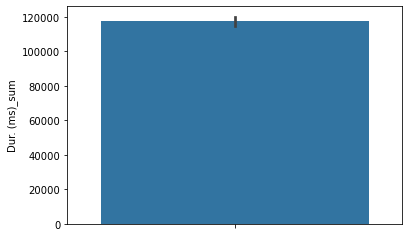

In [34]:
# Bar plot of session duration by using sample data of 6000
sns.barplot(y="Dur. (ms)_sum", data=newdf.sample(6000))
plt.show()

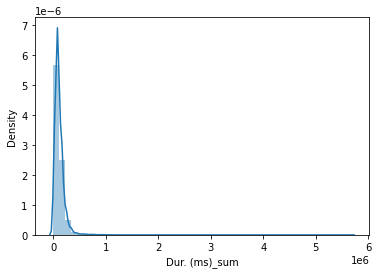

In [35]:
# Histogram of session duration by using sample data of 5000
sns.distplot(newdf['Dur. (ms)_sum'].sample(5000))
plt.show()

<AxesSubplot:ylabel='Dur. (ms)_sum'>

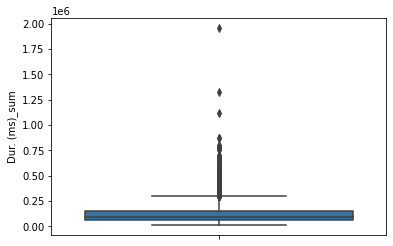

In [36]:
#Box plot of session duration by using sample dat of 5000
sns.boxplot(y=newdf['Dur. (ms)_sum'].sample(5000))

As we can see from above plots the session duration have outliers. And to get apprioprate result the outliers should be removed

# Total download(DL) and Total Upload(UL) graphical univariate analysis

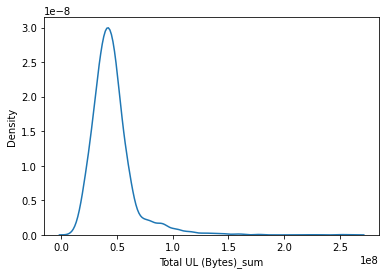

In [37]:
#Histogram fo total upload per user by using sample data of 5000 
sns.distplot(newdf['Total UL (Bytes)_sum'].sample(5000),hist=False)
plt.show()

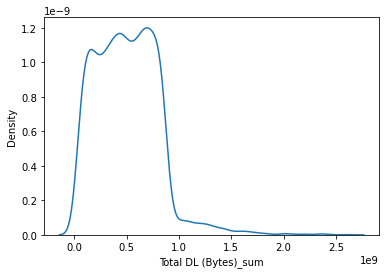

In [38]:
#Histogram of total download per user using sample data of 500
sns.distplot(newdf['Total DL (Bytes)_sum'].sample(5000),hist=False)
plt.show()

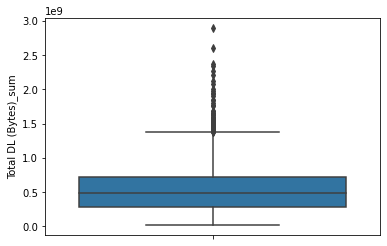

In [40]:
#Box plot of total download per user by using sample data of 5000
sns.boxplot(y=newdf['Total DL (Bytes)_sum'].sample(5000))
plt.show()

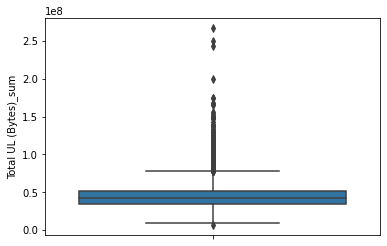

In [44]:
#Box plot of total upload per user by using sample data of 5000
sns.boxplot(y=newdf['Total UL (Bytes)_sum'].sample(5000))
plt.show()

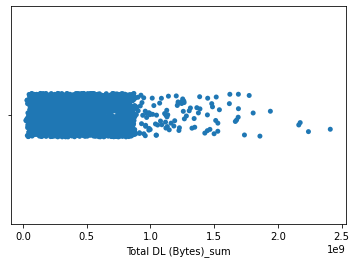

In [43]:
#Point plot of total download per user by using sample data of 2000
sns.stripplot(x=newdf['Total DL (Bytes)_sum'].sample(2000))
plt.show()

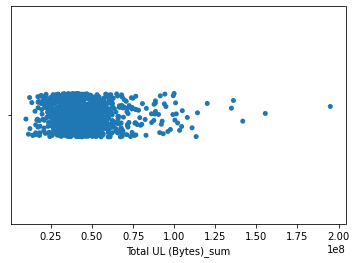

In [45]:
#Point plot of total upload per user by using sample data of 1000
sns.stripplot(x=newdf['Total UL (Bytes)_sum'].sample(1000))
plt.show()

As we ca see from above plots both total download and total upload have outliers and must be removed

# Graphical Univariate Analysis for the total data volume (in Bytes) during this session for each application

Social media

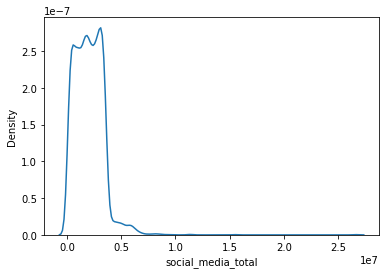

In [47]:
#Histogram of total data used by social media both upload and download in bytes by using sample data of 5000
sns.distplot(newdf['social_media_total'].sample(5000),hist=False)
plt.show()

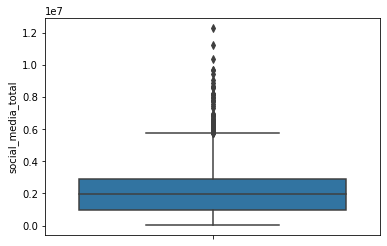

In [48]:
#Box plot of total data used by social media both upload and download in bytes by using sample data of 5000
sns.boxplot(y=newdf['social_media_total'].sample(5000))
plt.show()

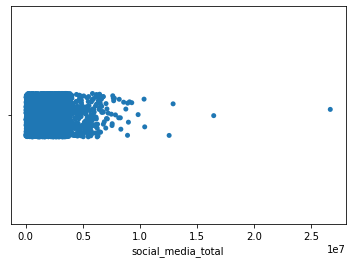

In [49]:
#Point plot of total data used by social media both upload and download in bytes by using sample data of 5000
sns.stripplot(x=newdf['social_media_total'].sample(5000))
plt.show()

As shown above most of the data lies below 0.5+e7 and have some outliers

# Google

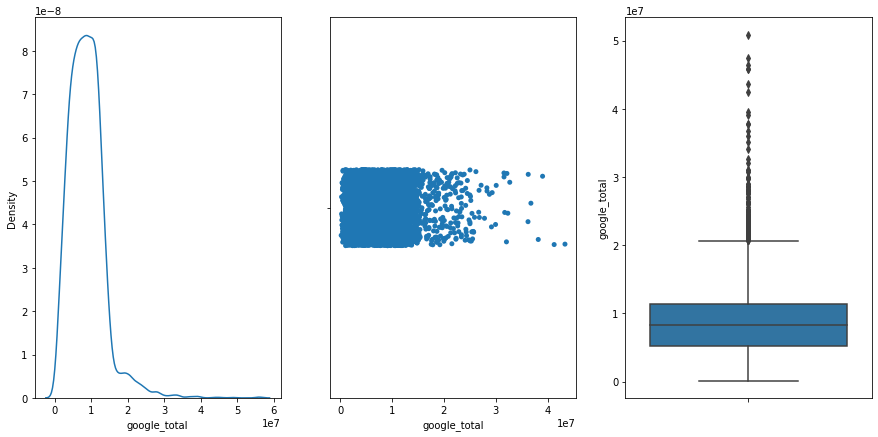

In [50]:
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['google_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['google_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['google_total'].sample(5000),ax=axs[2])
plt.show()

As we can see from above plots most of the data lies between 0.5+e7 and 2+e7 and there are some outliers that goes to 5.8+e7

# Email

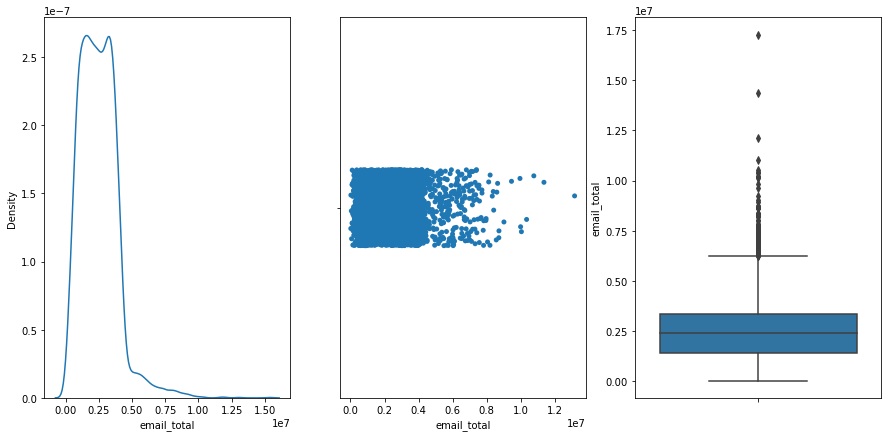

In [51]:

# Histogram, box plot, point plot of email data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['email_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['email_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['email_total'].sample(5000),ax=axs[2])
plt.show()

As we can see from above plots most of the data lies between 0.15+e7 and 0.4+e7 and there are some outliers that goes to 1.5+e7


# Youtube data

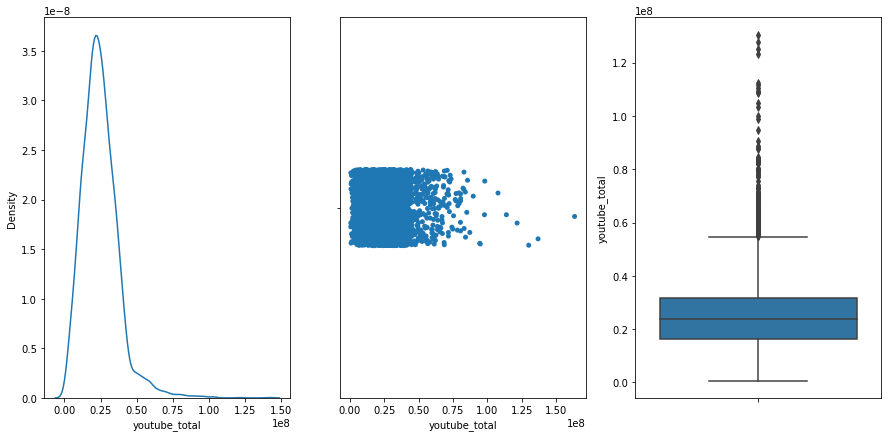

In [52]:

# Histogram, box plot, point plot of youtube data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['youtube_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['youtube_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['youtube_total'].sample(5000),ax=axs[2])
plt.show()

As we can see from above plots most of the data lies between 0.19+e8 and 0.4+e8 and there are some outliers that goes to 1.4+e8


# Netflix data

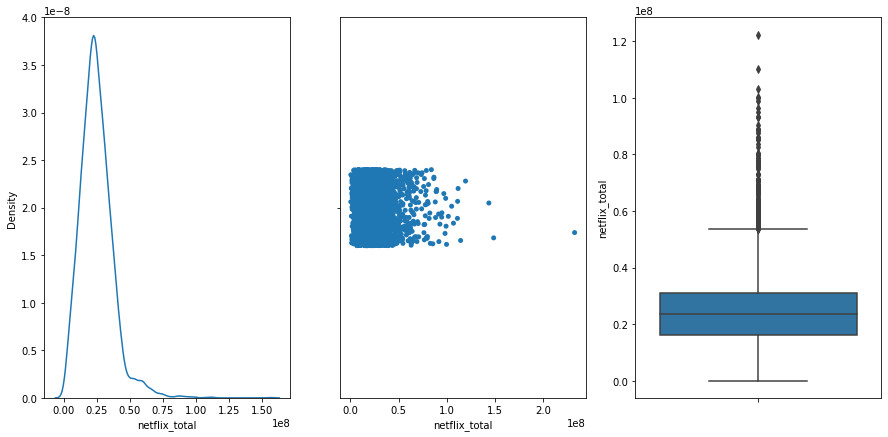

In [53]:
# Histogram, box plot, point plot of netflix data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['netflix_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['netflix_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['netflix_total'].sample(5000),ax=axs[2])
plt.show()

As we can see from above plots most of the data lies between 0.15+e8 and 0.4+e8 and there are some outliers that goes to 1.2+e8

# Gaming data

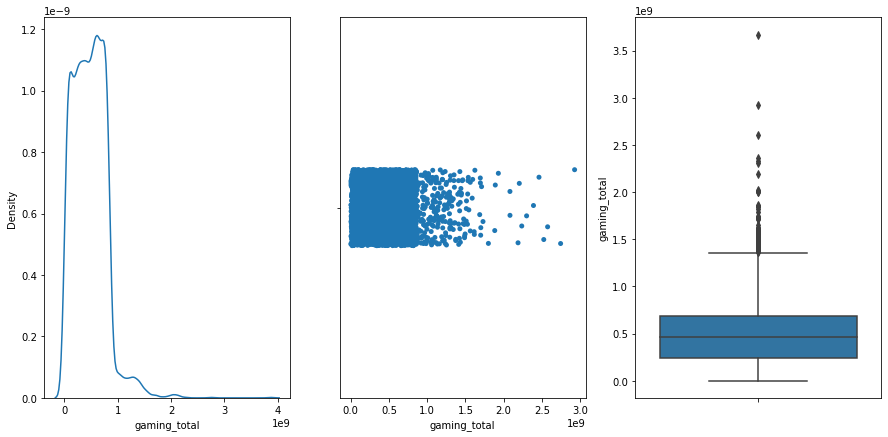

In [54]:
# Histogram, box plot, point plot of gaming data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['gaming_total'].sample(5000),hist=False,ax=axs[0])
sns.stripplot(x=newdf['gaming_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['gaming_total'].sample(5000),ax=axs[2])
plt.show()

As we can see from above plots most of the data lies between 0.2+e9 and 0.75+e9 and there are some outliers that goes to 2.9+e9


# Other data

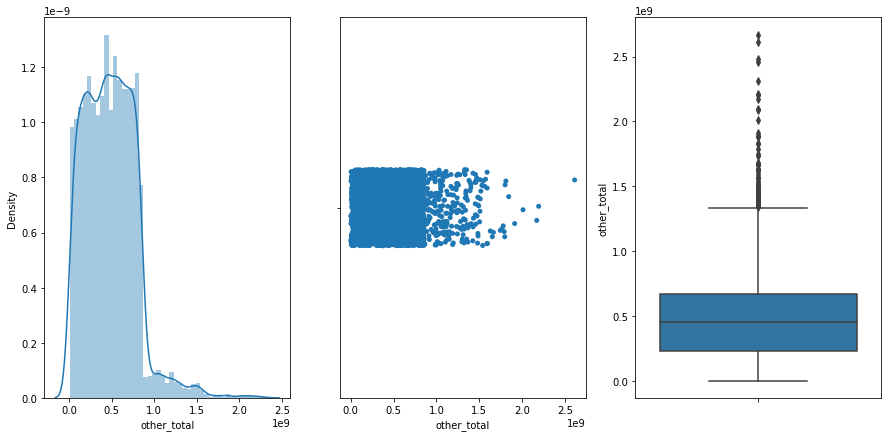

In [55]:
# Histogram, box plot, point plot of other data that is both upload and download by using sample data of 5000
a4_dims = (15, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.distplot(newdf['other_total'].sample(5000),ax=axs[0])
sns.stripplot(x=newdf['other_total'].sample(5000),ax=axs[1])
sns.boxplot(y=newdf['other_total'].sample(5000),ax=axs[2])
plt.show()

As we can see from above plots most of the data lies between 0.1+e9 and 1+e9 and there are some outliers that goes to 3.5+e9


Bivariate Analysis , explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings¶

In [66]:
newdf['total_DL_UL'] = newdf['Total DL (Bytes)_sum'] + newdf['Total UL (Bytes)_sum']

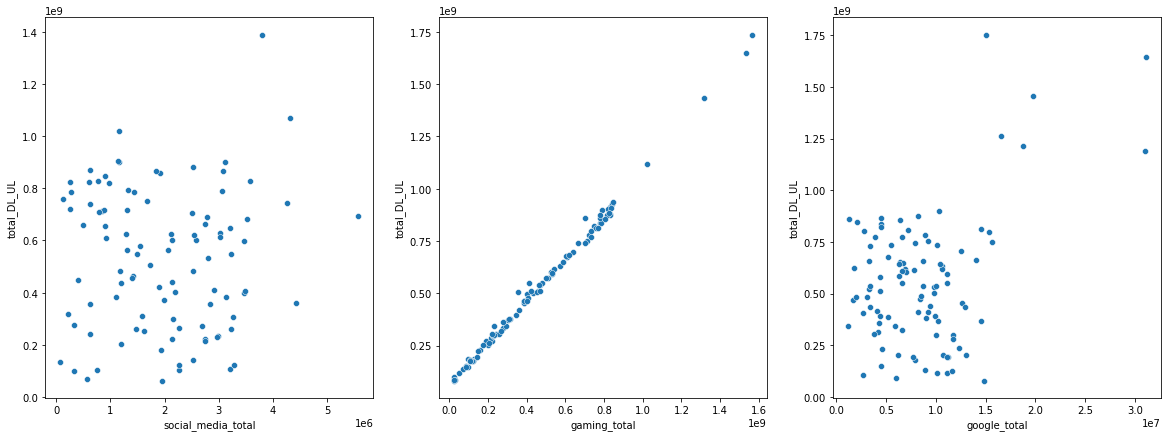

In [57]:
#Scatter plot for social media total, gaming total, and google total for comparasion by using sample data of 100
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=3,figsize=a4_dims)
sns.scatterplot(x="social_media_total", y="total_DL_UL",ax=axs[0], data=newdf.sample(100))
sns.scatterplot(x="gaming_total", y="total_DL_UL", ax=axs[1],data=newdf.sample(100))
sns.scatterplot(x="google_total", y="total_DL_UL",ax=axs[2], data=newdf.sample(100))
plt.show()

As we can see from above plot
1.There is a positive correlation between gaming total and total DL + UL.
2.There is no correlation between social media total and total DL + UL.
3.There is some correlation between google total and total DL + UL if we can clear all outliers.

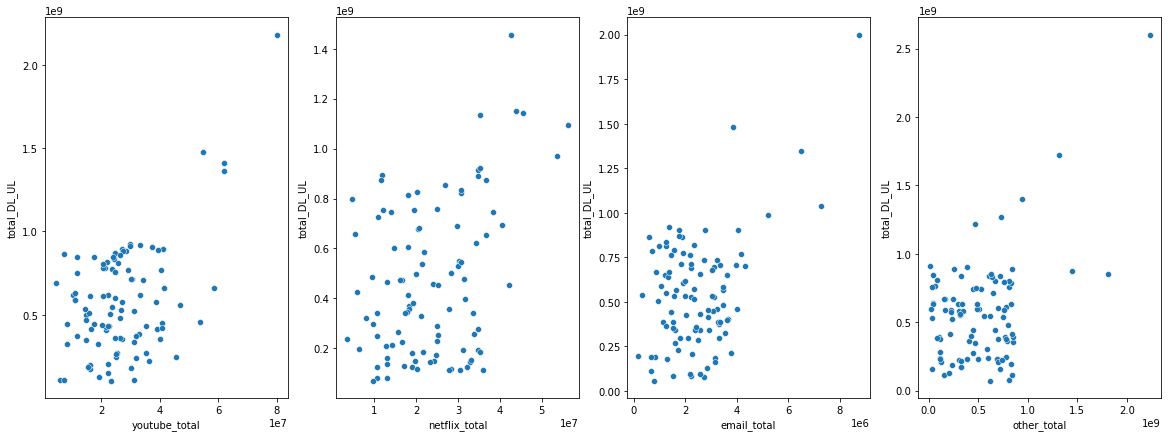

In [65]:
#Scatter plot for youtube total, netflix total,email total and other total for comparasion by using sample data of 1000
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=4,figsize=a4_dims)
sns.scatterplot(x="youtube_total", y="total_DL_UL",ax=axs[0], data=newdf.sample(100))
sns.scatterplot(x="netflix_total", y="total_DL_UL",ax=axs[1], data=newdf.sample(100))
sns.scatterplot(x="email_total", y="total_DL_UL",ax=axs[2], data=newdf.sample(100))
sns.scatterplot(x="other_total", y="total_DL_UL",ax=axs[3], data=newdf.sample(100))
plt.show()

As we can see from above plot

1.There is no correlation between youtube total and total DL + UL.
2.There is some positive correlation between netflix total and total DL + UL if we can clear the outliers.
3.There is no correlation between email total and total DL + UL.
4.There is no correlation between email total and total DL + UL

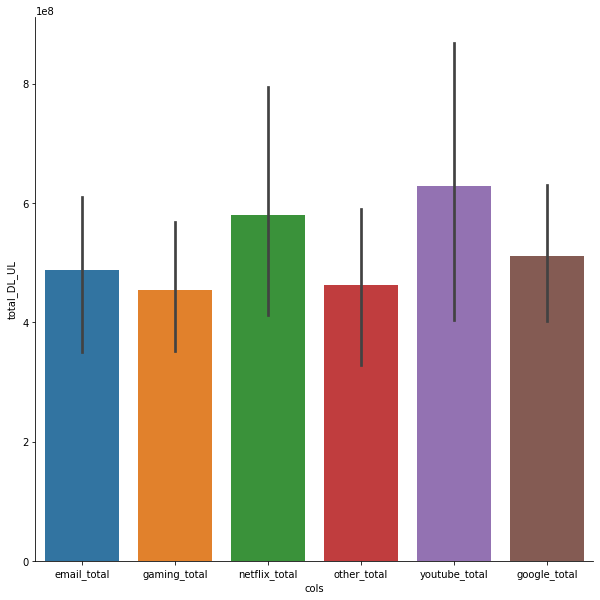

In [76]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = newdf.iloc[:,-8:-1].melt(id_vars='total_DL_UL', var_name='cols',  value_name='vals')
sns.barplot(y='total_DL_UL', x='cols', data=tidy.sample(100), ax=ax1)
sns.despine(fig)


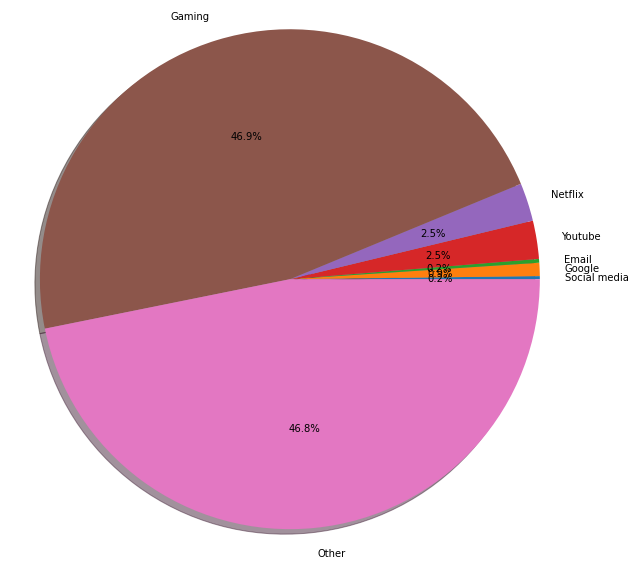

In [68]:
labels = ['Social media', 'Google', 'Email','Youtube','Netflix','Gaming','Other']
sizes = [newdf['social_media_total'].sum(),
         newdf['google_total'].sum(),
         newdf['email_total'].sum(),
         newdf['youtube_total'].sum(),
         newdf['netflix_total'].sum(),
         newdf['gaming_total'].sum(),
         newdf['other_total'].sum(),
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

# Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class

In [69]:
newdf['decile'] = pd.qcut(newdf['Dur. (ms)_sum'], 5, labels=False)

In [70]:
newdf.tail(10)

,Bearer Id_count,Dur. (ms)_sum,Total DL (Bytes)_sum,Total UL (Bytes)_sum,Social Media DL (Bytes)_sum,Social Media UL (Bytes)_sum,Google DL (Bytes)_sum,Google UL (Bytes)_sum,Email DL (Bytes)_sum,Email UL (Bytes)_sum,Youtube DL (Bytes)_sum,Youtube UL (Bytes)_sum,Netflix DL (Bytes)_sum,Netflix UL (Bytes)_sum,Gaming DL (Bytes)_sum,Gaming UL (Bytes)_sum,Other DL (Bytes)_sum,Other UL (Bytes)_sum,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total,total_DL_UL,decile
Bearer Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.318654e+19,1,128680.0,6.072856e+08,60250500.0,1781135.0,46163.0,6027659.0,438733.0,3273423.0,363887.0,1513320.0,14825365.0,9419344.0,19452231.0,5.852707e+08,12456976.0,3.079202e+08,12667145.0,1827298.0,6466392.0,3637310.0,16338685.0,28871575.0,5.977277e+08,3.205874e+08,6.675361e+08,3
1.318654e+19,1,86399.0,4.866189e+08,32743279.0,1210093.0,63505.0,1408544.0,2900072.0,1307728.0,94270.0,1541100.0,870424.0,15573636.0,21566388.0,4.655778e+08,4790707.0,6.076484e+08,2457913.0,1273598.0,4308616.0,1401998.0,2411524.0,37140024.0,4.703685e+08,6.101064e+08,5.193622e+08,1
1.318654e+19,1,80273.0,3.818779e+08,21494233.0,208010.0,41789.0,2184473.0,2842846.0,510452.0,120908.0,6770562.0,5816126.0,20834659.0,6647084.0,3.513697e+08,2814103.0,1.451509e+07,3211377.0,249799.0,5027319.0,631360.0,12586688.0,27481743.0,3.541838e+08,1.772647e+07,4.033721e+08,1
1.318654e+19,2,210111.0,1.161082e+09,100193462.0,1120763.0,48012.0,18639638.0,7879494.0,4619580.0,1237686.0,33418481.0,15158731.0,17221565.0,36725363.0,1.086062e+09,12205192.0,1.017762e+09,26938984.0,1168775.0,26519132.0,5857266.0,48577212.0,53946928.0,1.098267e+09,1.044701e+09,1.261275e+09,4
1.318654e+19,1,86401.0,7.906938e+08,56102807.0,2653527.0,61628.0,9706485.0,1977692.0,1513184.0,755027.0,6522758.0,16816221.0,7026637.0,9863471.0,7.632713e+08,10236270.0,7.623181e+08,16392498.0,2715155.0,11684177.0,2268211.0,23338979.0,16890108.0,7.735075e+08,7.787106e+08,8.467967e+08,2
1.318654e+19,1,80024.0,1.452931e+08,35412664.0,3240226.0,38284.0,2036152.0,2271168.0,2410615.0,387548.0,12404964.0,4343114.0,11108134.0,21649273.0,1.140930e+08,2834548.0,6.958812e+08,3888729.0,3278510.0,4307320.0,2798163.0,16748078.0,32757407.0,1.169276e+08,6.997699e+08,1.807058e+08,1
1.318654e+19,1,145291.0,3.870016e+08,36189587.0,3062671.0,48953.0,9363661.0,4001970.0,2192057.0,866373.0,22147919.0,2152449.0,21468525.0,8603105.0,3.287668e+08,7569327.0,3.712613e+08,12947410.0,3111624.0,13365631.0,3058430.0,24300368.0,30071630.0,3.363361e+08,3.842087e+08,4.231912e+08,3
1.318654e+19,1,86399.0,8.726888e+08,35919460.0,720996.0,42836.0,1541915.0,2100839.0,2315638.0,839789.0,11879062.0,1290963.0,22596930.0,11943452.0,8.336343e+08,10607174.0,6.972603e+08,9094407.0,763832.0,3642754.0,3155427.0,13170025.0,34540382.0,8.442414e+08,7.063547e+08,9.086083e+08,1
1.318654e+19,1,86399.0,3.863551e+08,40877676.0,2492460.0,39905.0,11318188.0,466218.0,2612190.0,618629.0,22163800.0,16763435.0,9522397.0,8346624.0,3.382460e+08,1845068.0,1.738549e+07,12797797.0,2532365.0,11784406.0,3230819.0,38927235.0,17869021.0,3.400911e+08,3.018329e+07,4.272327e+08,1


In [71]:
data_per_decile = newdf.groupby(['decile']).agg({'total_DL_UL':['sum']})
data_per_decile.columns = ["_".join(x) for x in data_per_decile.columns.ravel()]

In [72]:
data_per_decile

,total_DL_UL_sum
decile,
0,1.384439e+13
1,1.881200e+13
2,8.618752e+12
3,1.404231e+13
4,1.904724e+13


<AxesSubplot:ylabel='total_DL_UL_sum'>

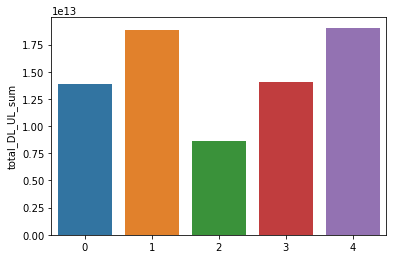

In [73]:
sns.barplot(x=[0,1,2,3,4],y="total_DL_UL_sum",data=data_per_decile)

# Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings

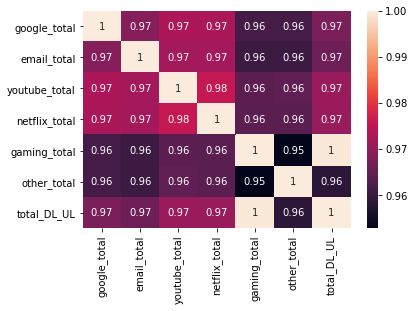

In [74]:
#Correlation matrix between the all application and also total_DL_UL
sns.heatmap(newdf.iloc[:,-8:-1].corr(),annot = True)
plt.show()

In [75]:
newdf.iloc[:,-8:-1].corr()

,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total,total_DL_UL
google_total,1.000000,0.968798,0.972955,0.972657,0.961307,0.961354,0.967468
email_total,0.968798,1.000000,0.971802,0.971814,0.960275,0.960380,0.966115
youtube_total,0.972955,0.971802,1.000000,0.975813,0.964164,0.964507,0.971003
netflix_total,0.972657,0.971814,0.975813,1.000000,0.964004,0.963871,0.970849
gaming_total,0.961307,0.960275,0.964164,0.964004,1.000000,0.952810,0.999524
other_total,0.961354,0.960380,0.964507,0.963871,0.952810,1.000000,0.958469
total_DL_UL,0.967468,0.966115,0.971003,0.970849,0.999524,0.958469,1.000000
